## Predicting whether students leave

Imported data file created and cleaned in R, from the team GitHub and displayed the first few rows. To better understand the data before encoding, we displayed the distinct Courses included in the dataset and the distinct Grades given.We also found the total count of rows that were first gen vs not. Basic cleaning included dropping Enrolled Student Count and chanign Cohort.Term and Flag to integers.

In [124]:
import pandas as pd
import numpy as np

In [125]:
df = pd.read_csv("https://raw.githubusercontent.com/mwalstad/Project-3-ISA-616/main/StudentData_withGrades")
df.drop('Unnamed: 0', inplace = True, axis = 1)
display(df.tail(65))

,Student.ID,Term.Code,Gender,First.Generation.Indicator,Cum.UG.Crs.GPA,Cohort.Term,Enrolled.Student.Count,Major.1,Major.2,Major.3,Minor,Thematic.Sequence.Title,Flag,Course,Final Letter Grade Group
5954,8349622,202110,Female,First Generation College Stdnt,3.95,202010.0,1.0,Accountancy,NaN,NaN,NaN,NaN,0.0,ECO201,A
5955,8349622,202110,Female,First Generation College Stdnt,3.95,202010.0,1.0,Accountancy,NaN,NaN,NaN,NaN,0.0,ISA225,A
5956,8349622,202120,Female,First Generation College Stdnt,3.96,202010.0,1.0,Accountancy,NaN,NaN,NaN,ISA2 Applied Business Statistics,0.0,MGT291,A
5957,8349622,202120,Female,First Generation College Stdnt,3.96,202010.0,1.0,Accountancy,NaN,NaN,NaN,ISA2 Applied Business Statistics,0.0,ISA235,A
5958,8349622,202210,Female,First Generation College Stdnt,3.93,202010.0,1.0,Accountancy,NaN,NaN,NaN,ISA2 Applied Business Statistics,0.0,FIN301,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010.0,1.0,Finance,NaN,NaN,NaN,ISA2 Applied Business Statistics,1.0,ISA235,B
6015,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010.0,1.0,Finance,NaN,NaN,NaN,ISA2 Applied Business Statistics,1.0,MGT291,B
6016,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010.0,1.0,Finance,NaN,NaN,NaN,ISA2 Applied Business Statistics,1.0,ISA225,B
6017,8398786,202310,Male,Not First Generation College Stdnt,2.59,202010.0,1.0,Finance,NaN,NaN,NaN,ISA2 Applied Business Statistics,1.0,NaN,NaN


In [126]:
print(df['Course'].value_counts())

CSE148    629
BUS104    624
ACC221    503
ISA235    439
ISA225    435
ECO201    416
MGT291    379
FIN301    357
ISA125    310
MTH141    168
MGT295    161
MTH151    131
Name: Course, dtype: int64


In [127]:
print(df['Flag'].value_counts())

0.0    4682
1.0    1144
Name: Flag, dtype: int64


In [128]:
print(df['First.Generation.Indicator'].value_counts())

Not First Generation College Stdnt    5483
First Generation College Stdnt         343
Name: First.Generation.Indicator, dtype: int64


In [129]:
print(df['Final Letter Grade Group'].value_counts())

A    2309
B    1629
C     495
D     120
F      31
Name: Final Letter Grade Group, dtype: int64


In [130]:
print(len(df['Student.ID'].value_counts()))

823


In [131]:
df.drop('Enrolled.Student.Count', axis = 1, inplace = True)

non_finite_mask = ~df['Cohort.Term'].isin([np.nan, np.inf, -np.inf])
df.loc[~non_finite_mask, 'Cohort.Term'] = 0
df['Cohort.Term'] = df['Cohort.Term'].astype(int)

non_finite_mask = ~df['Flag'].isin([np.nan, np.inf, -np.inf])
df.loc[~non_finite_mask, 'Flag'] = 0
df['Flag'] = df['Flag'].astype(int)

In [132]:
df.head()

,Student.ID,Term.Code,Gender,First.Generation.Indicator,Cum.UG.Crs.GPA,Cohort.Term,Major.1,Major.2,Major.3,Minor,Thematic.Sequence.Title,Flag,Course,Final Letter Grade Group
0,8071760,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN
1,8085468,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN
2,8085741,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN
3,8088041,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN
4,8088162,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN


## Add Dummy Variables

#### Add dummy variables for is Minor, is Thematic Sequence, and for is Major

In [133]:
import numpy as np
df['is_BA_Major'] = np.where(
    (df['Major.1'] == 'BA Major') |
    (df['Major.2'] == 'BA Major') |
    (df['Major.3'] == 'BA Major'),
    1,
    0
)

In [134]:
df['is_BA_Thematic'] = np.where(df['Thematic.Sequence.Title'] == 'ISA2 Applied Business Statistics', 1, 0)

In [135]:
df['is_BA_minor'] = np.where(df['Minor'] == 'Business Analytics', 1, 0)
display(df.head(5))

print(len(df['Student.ID'].value_counts()))

,Student.ID,Term.Code,Gender,First.Generation.Indicator,Cum.UG.Crs.GPA,Cohort.Term,Major.1,Major.2,Major.3,Minor,Thematic.Sequence.Title,Flag,Course,Final Letter Grade Group,is_BA_Major,is_BA_Thematic,is_BA_minor
0,8071760,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN,1,0,0
1,8085468,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN,1,0,0
2,8085741,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN,1,0,0
3,8088041,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN,1,0,0
4,8088162,202410,Male,Not First Generation College Stdnt,NaN,202410,BA Major,NaN,NaN,NaN,NaN,0,NaN,NaN,1,0,0


823


#### Count As, Bs, Cs, Ds

In [136]:
# Filter rows where Grade is 'A' and group by Student.ID to count occurrences
df_grade_count = df[df['Final Letter Grade Group'] == 'A'].groupby('Student.ID').size().reset_index(name='A_Grade_Count')

# Merge the count back to the original DataFrame
df = pd.merge(df, df_grade_count, on='Student.ID', how='left')

# Fill NaN values in the new column with 0
df['A_Grade_Count'] = df['A_Grade_Count'].fillna(0)
#display(df.tail(60))

In [137]:
# Filter rows where Grade is 'A' and group by Student.ID to count occurrences
df_grade_count = df[df['Final Letter Grade Group'] == 'B'].groupby('Student.ID').size().reset_index(name='B_Grade_Count')

# Merge the count back to the original DataFrame
df = pd.merge(df, df_grade_count, on='Student.ID', how='left')

# Fill NaN values in the new column with 0
df['B_Grade_Count'] = df['B_Grade_Count'].fillna(0)
#display(df.tail(60))

In [138]:
# Filter rows where Grade is 'A' and group by Student.ID to count occurrences
df_grade_count = df[df['Final Letter Grade Group'] == 'C'].groupby('Student.ID').size().reset_index(name='C_Grade_Count')

# Merge the count back to the original DataFrame
df = pd.merge(df, df_grade_count, on='Student.ID', how='left')

# Fill NaN values in the new column with 0
df['C_Grade_Count'] = df['C_Grade_Count'].fillna(0)
#display(df.tail(60))

In [139]:
# Filter rows where Grade is 'D' and group by Student.ID to count occurrences
df_grade_count = df[df['Final Letter Grade Group'] == 'D'].groupby('Student.ID').size().reset_index(name='D_Grade_Count')

# Merge the count back to the original DataFrame
df = pd.merge(df, df_grade_count, on='Student.ID', how='left')

# Fill NaN values in the new column with 0
df['D_Grade_Count'] = df['D_Grade_Count'].fillna(0)


In [140]:
# Filter rows where Grade is 'D' and group by Student.ID to count occurrences
df_grade_count = df[df['Final Letter Grade Group'] == 'F'].groupby('Student.ID').size().reset_index(name='F_Grade_Count')

# Merge the count back to the original DataFrame
df = pd.merge(df, df_grade_count, on='Student.ID', how='left')

# Fill NaN values in the new column with 0
df['F_Grade_Count'] = df['F_Grade_Count'].fillna(0)
display(df.tail(3))

,Student.ID,Term.Code,Gender,First.Generation.Indicator,Cum.UG.Crs.GPA,Cohort.Term,Major.1,Major.2,Major.3,Minor,...,Course,Final Letter Grade Group,is_BA_Major,is_BA_Thematic,is_BA_minor,A_Grade_Count,B_Grade_Count,C_Grade_Count,D_Grade_Count,F_Grade_Count
6016,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010,Finance,NaN,NaN,NaN,...,ISA225,B,0,1,0,2.0,5.0,1.0,2.0,0.0
6017,8398786,202310,Male,Not First Generation College Stdnt,2.59,202010,Finance,NaN,NaN,NaN,...,NaN,NaN,0,1,0,2.0,5.0,1.0,2.0,0.0
6018,8398786,202320,Male,Not First Generation College Stdnt,2.60,202010,Finance,NaN,NaN,NaN,...,NaN,NaN,0,1,0,2.0,5.0,1.0,2.0,0.0


#### Has Taken Dummy for all classes (0 = not taken, 1 = F, 2 = D, 3 = C, 4 = B, 5 = A)

## Encode the Student's 'School Age'

In [141]:
# Define custom aggregation functions
agg_funcs = {
    'Term.Code': ['first', 'last'],
}

# Group by 'student_id' and apply aggregation functions
student_term_info = df.groupby('Student.ID').agg(agg_funcs).reset_index()

# Rename the columns for clarity
student_term_info.columns = ['Student.ID', 'first_term_code', 'last_term_code']

# Merge the aggregated information back into the original DataFrame
df = pd.merge(df, student_term_info, on='Student.ID', how='left')
df['first_term_code'] = df['first_term_code'] // 100
df['last_term_code'] = df['last_term_code'] // 100

df['student_year'] = df['last_term_code'] - df['first_term_code']

df.drop(['first_term_code', 'last_term_code'], axis = 1, inplace = True)

display(df.tail(12))

,Student.ID,Term.Code,Gender,First.Generation.Indicator,Cum.UG.Crs.GPA,Cohort.Term,Major.1,Major.2,Major.3,Minor,...,Final Letter Grade Group,is_BA_Major,is_BA_Thematic,is_BA_minor,A_Grade_Count,B_Grade_Count,C_Grade_Count,D_Grade_Count,F_Grade_Count,student_year
6007,8398786,202010,Male,Not First Generation College Stdnt,2.38,202010,Business Economics,NaN,NaN,NaN,...,B,0,0,0,2.0,5.0,1.0,2.0,0.0,3
6008,8398786,202010,Male,Not First Generation College Stdnt,2.38,202010,Business Economics,NaN,NaN,NaN,...,D,0,0,0,2.0,5.0,1.0,2.0,0.0,3
6009,8398786,202020,Male,Not First Generation College Stdnt,2.40,202010,Business Economics,NaN,NaN,NaN,...,C,0,0,0,2.0,5.0,1.0,2.0,0.0,3
6010,8398786,202120,Male,Not First Generation College Stdnt,2.54,202010,Business Economics,NaN,NaN,NaN,...,A,0,0,0,2.0,5.0,1.0,2.0,0.0,3
6011,8398786,202210,Male,Not First Generation College Stdnt,2.66,202010,Finance,NaN,NaN,NaN,...,D,0,0,0,2.0,5.0,1.0,2.0,0.0,3
6012,8398786,202210,Male,Not First Generation College Stdnt,2.66,202010,Finance,NaN,NaN,NaN,...,B,0,0,0,2.0,5.0,1.0,2.0,0.0,3
6013,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010,Finance,NaN,NaN,NaN,...,A,0,1,0,2.0,5.0,1.0,2.0,0.0,3
6014,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010,Finance,NaN,NaN,NaN,...,B,0,1,0,2.0,5.0,1.0,2.0,0.0,3
6015,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010,Finance,NaN,NaN,NaN,...,B,0,1,0,2.0,5.0,1.0,2.0,0.0,3
6016,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010,Finance,NaN,NaN,NaN,...,B,0,1,0,2.0,5.0,1.0,2.0,0.0,3


## Condense Data to Student Level

In [142]:
# First drop the columns that you do not need
df.drop(['Major.1','Major.2', 'Major.3', 'Minor', 'Thematic.Sequence.Title'], axis = 1, inplace = True)

In [143]:
df

,Student.ID,Term.Code,Gender,First.Generation.Indicator,Cum.UG.Crs.GPA,Cohort.Term,Flag,Course,Final Letter Grade Group,is_BA_Major,is_BA_Thematic,is_BA_minor,A_Grade_Count,B_Grade_Count,C_Grade_Count,D_Grade_Count,F_Grade_Count,student_year
0,8071760,202410,Male,Not First Generation College Stdnt,NaN,202410,0,NaN,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0
1,8085468,202410,Male,Not First Generation College Stdnt,NaN,202410,0,NaN,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0
2,8085741,202410,Male,Not First Generation College Stdnt,NaN,202410,0,NaN,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0
3,8088041,202410,Male,Not First Generation College Stdnt,NaN,202410,0,NaN,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0
4,8088162,202410,Male,Not First Generation College Stdnt,NaN,202410,0,NaN,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010,1,ISA235,B,0,1,0,2.0,5.0,1.0,2.0,0.0,3
6015,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010,1,MGT291,B,0,1,0,2.0,5.0,1.0,2.0,0.0,3
6016,8398786,202220,Male,Not First Generation College Stdnt,2.69,202010,1,ISA225,B,0,1,0,2.0,5.0,1.0,2.0,0.0,3
6017,8398786,202310,Male,Not First Generation College Stdnt,2.59,202010,1,NaN,NaN,0,1,0,2.0,5.0,1.0,2.0,0.0,3


In [144]:
# Group by 'Student.ID' and keep only the first row for each group
Student_set = df.groupby('Student.ID').last().reset_index()

# Display the result
#print(Student_set)

## Dummy Encode the Variables

In [145]:
df = pd.get_dummies(Student_set)
df

,Student.ID,Term.Code,Cum.UG.Crs.GPA,Cohort.Term,Flag,is_BA_Major,is_BA_Thematic,is_BA_minor,A_Grade_Count,B_Grade_Count,...,Course_ISA235,Course_MGT291,Course_MGT295,Course_MTH141,Course_MTH151,Final Letter Grade Group_A,Final Letter Grade Group_B,Final Letter Grade Group_C,Final Letter Grade Group_D,Final Letter Grade Group_F
0,8071760,202410,NaN,202410,0,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,8085468,202410,NaN,202410,0,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,8085741,202410,NaN,202410,0,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,8088041,202410,NaN,202410,0,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,8088162,202410,NaN,202410,0,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,8351528,202310,3.31,202010,1,0,0,1,4.0,3.0,...,0,0,0,0,0,0,0,1,0,0
819,8354519,202120,3.81,201810,0,0,1,0,7.0,2.0,...,0,0,0,0,0,1,0,0,0,0
820,8371170,202320,3.15,202110,1,0,0,1,1.0,3.0,...,0,0,0,0,0,0,1,0,0,0
821,8383906,202120,3.84,201810,0,0,0,0,5.0,3.0,...,0,0,0,0,0,1,0,0,0,0


## Remove Null

In [146]:
df = df.dropna()
df

,Student.ID,Term.Code,Cum.UG.Crs.GPA,Cohort.Term,Flag,is_BA_Major,is_BA_Thematic,is_BA_minor,A_Grade_Count,B_Grade_Count,...,Course_ISA235,Course_MGT291,Course_MGT295,Course_MTH141,Course_MTH151,Final Letter Grade Group_A,Final Letter Grade Group_B,Final Letter Grade Group_C,Final Letter Grade Group_D,Final Letter Grade Group_F
29,8100919,202410,4.00,202410,0,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34,8102014,202410,4.00,202410,0,0,0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
112,8124641,202410,3.79,202310,0,1,0,0,2.0,2.0,...,0,0,0,0,0,1,0,0,0,0
113,8125971,202410,3.90,202310,0,1,0,0,3.0,0.0,...,0,0,0,0,0,1,0,0,0,0
114,8126128,202320,2.58,202310,1,1,0,0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,8351528,202310,3.31,202010,1,0,0,1,4.0,3.0,...,0,0,0,0,0,0,0,1,0,0
819,8354519,202120,3.81,201810,0,0,1,0,7.0,2.0,...,0,0,0,0,0,1,0,0,0,0
820,8371170,202320,3.15,202110,1,0,0,1,1.0,3.0,...,0,0,0,0,0,0,1,0,0,0
821,8383906,202120,3.84,201810,0,0,0,0,5.0,3.0,...,0,0,0,0,0,1,0,0,0,0


In [147]:
X = df.drop(['Student.ID','Flag','Term.Code', 'Final Letter Grade Group_A', 'Final Letter Grade Group_B', 'Final Letter Grade Group_C',
             'Final Letter Grade Group_D', 'Final Letter Grade Group_F', 'is_BA_Major',	'is_BA_Thematic','is_BA_minor', 'student_year'], axis = 1)
y = df.Flag

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 591)


In [148]:
y.value_counts()

0    555
1    154
Name: Flag, dtype: int64

## Balancing the Dataset

In [149]:
# resample the data to obtain a higher proportion of 1s
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the desired proportion of ones
desired_proportion_of_ones = 0.5  # You can adjust this value as needed

# Use SMOTE with a specific sampling strategy
smote = SMOTE(sampling_strategy=desired_proportion_of_ones)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Print the distribution of classes in the resampled dataset
print(sorted(Counter(y_resampled_smote).items()))

# Train the Logistic Regression model on the SMOTE-resampled data
clf_smote = LogisticRegression().fit(X_resampled_smote, y_resampled_smote)

# Use ADASYN with a specific sampling strategy
adasyn = ADASYN(sampling_strategy=desired_proportion_of_ones)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Print the distribution of classes in the resampled dataset
print(sorted(Counter(y_resampled_adasyn).items()))

# Train the Logistic Regression model on the ADASYN-resampled data
clf_adasyn = LogisticRegression().fit(X_resampled_adasyn, y_resampled_adasyn)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled_adasyn, y_resampled_adasyn, test_size = 0.3, random_state = 591)


[(0, 450), (1, 225)]
[(0, 450), (1, 225)]


## XgBoost Classifier

Accuracy: 0.916256157635468
Recall: 0.711864406779661
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       144
           1       1.00      0.71      0.83        59

    accuracy                           0.92       203
   macro avg       0.95      0.86      0.89       203
weighted avg       0.93      0.92      0.91       203



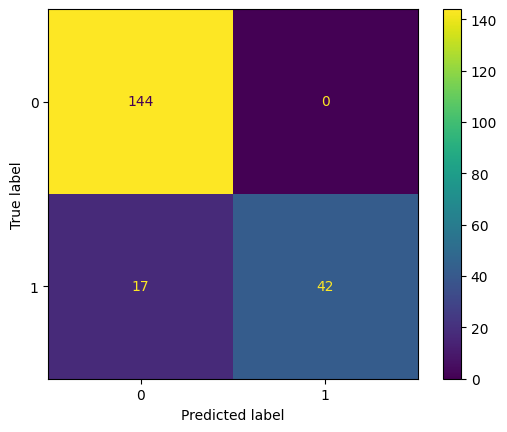

In [150]:
## XGBoost
from xgboost import XGBClassifier


# instance
xgb = XGBClassifier(n_jobs = -1)

xgb.fit(X_train,y_train)

recall = recall_score(y_test2, xgb.predict(X_test2))
print("Accuracy:", accuracy_score(y_test2, xgb.predict(X_test2)))
print("Recall:", recall)
print(classification_report(y_test2, xgb.predict(X_test2)))

ConfusionMatrixDisplay(confusion_matrix(y_test2, xgb.predict(X_test2))).plot()

In [151]:
data = {
    'feature_names_in_': xgb.feature_names_in_,
    'feature_importances_': xgb.feature_importances_,
}

perf = pd.DataFrame(data)

# Display the result
display(perf.sort_values(by='feature_importances_', ascending=False))

,feature_names_in_,feature_importances_
16,Course_ISA125,0.093700
1,Cohort.Term,0.076116
15,Course_FIN301,0.071564
2,A_Grade_Count,0.067730
12,Course_BUS104,0.061017
6,F_Grade_Count,0.060822
3,B_Grade_Count,0.056916
4,C_Grade_Count,0.054773
5,D_Grade_Count,0.051330
19,Course_MGT291,0.051303


AUC: 0.635907335907336


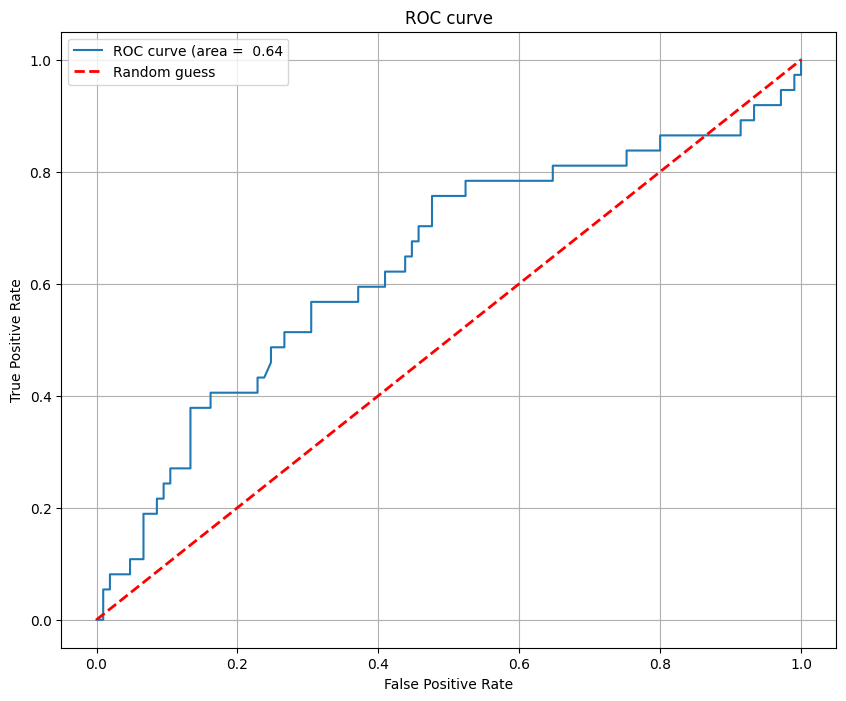

In [152]:
phat = xgb.predict_proba(X_test)[:,1]
phat
## import modules
from sklearn.metrics import auc, roc_curve

## Get TPR, FPR and Thresholds
fpr, tpr, thresh = roc_curve(y_test, phat)


## Get AUC
AUC_val = auc(fpr, tpr)
print("AUC:", AUC_val)

## Plot ROC Curve with AUC
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label= f'ROC curve (area = {AUC_val: 0.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [153]:
import pickle as pkl

filenm = 'Student_Churn_Prediction_model.pickle'
#Step 1: Create or open a file with write-binary mode and save the model to it
pickle = pkl.dump(xgb, open(filenm, 'wb'))

In [ ]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb